In [ ]:
#Reference: Python for Microscopists by DigitalSreeni - The best channel in my opinion.
# https://www.youtube.com/watch?v=s_hDL2fGvow

In [ ]:
%matplotlib inline

# 0003_Basic Image Processing Using Scipy - 1000 days of Python 

## Read an image

In [1]:
pwd

'D:\\desktop\\Python\\1000 days of python'

In [2]:
cd reference\digitalSreeni\python_for_microscopists-master

D:\desktop\Python\1000 days of python\reference\digitalSreeni\python_for_microscopists-master


In [3]:
pwd

'D:\\desktop\\Python\\1000 days of python\\reference\\digitalSreeni\\python_for_microscopists-master'

In [ ]:
"""
#Image processing using Scipy
Scipy is a python library that is part of numpy stack. 
It contains modules for linear algebra, FFT, signal processing and
image processing. Not designed for image processing but has a few tools

"""

In [4]:
#You can use imread from scipy to read images

from scipy import misc
img = misc.imread("images/monkey.jpg")
print(type(img))   #numpy array

AttributeError: module 'scipy.misc' has no attribute 'imread'

In [5]:
#imread is deprecated in SciPy 1.0.0, and will be removed in 1.2.0. Use imageio.imread instead.

In [6]:
import imageio
img = imageio.imread("images/monkey.jpg")
print(type(img))   #numpy array

<class 'imageio.core.util.Array'>


In [7]:
#since it gives a message about imread being depreciated I will use
#skimage which also gives a numpy array. 

from skimage import io
img = io.imread("images/monkey.jpg")
print(type(img))  #numpy array

<class 'numpy.ndarray'>


In [8]:
from skimage import io, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

In [9]:
img = img_as_ubyte(io.imread("images/monkey.jpg", as_gray=True))
#img_as_ubyte converts image to 8 bit unsigned int.
print(type(img))
print(img.shape, img.dtype)
#plt.imshow(img) 

<class 'numpy.ndarray'>
(330, 220) uint8


In [10]:
#individual pixel values
print(img[0,0])   #reports pixel value at 0,0. Remove img_as_ubte and see the value.
#also make as_grey=True and see the above values

63


133 3 255


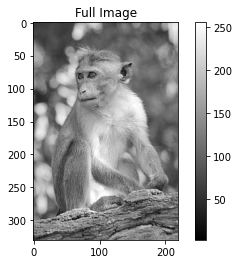

[[69 70 72 73 74]
 [70 71 73 75 75]
 [71 72 75 76 75]
 [71 73 76 78 76]
 [72 74 77 79 77]]


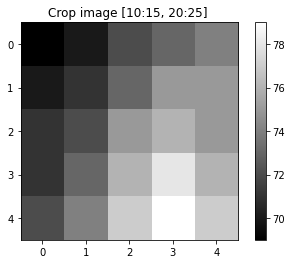

In [11]:
mean_grey = img.mean()
max_value = img.max()
min_value = img.min()
print(round(mean_grey), min_value, max_value)
plt.imshow(img,cmap='gray')
plt.colorbar()
plt.title('Full Image')
plt.show()


#pixel values from a slice
print(img[10:15, 20:25])  #Values from a slice
plt.imshow(img[10:15, 20:25],cmap='gray')
plt.title('Crop image [10:15, 20:25] ')
plt.colorbar()
plt.show()

## Geometric transformation

### Flipped

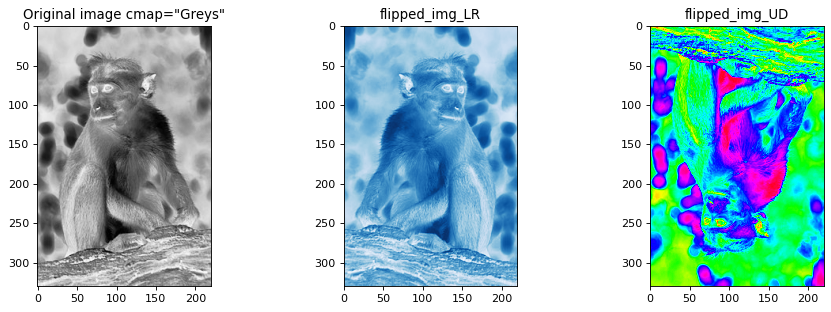

In [14]:
from matplotlib.pyplot import figure
flipped_img_LR = np.fliplr(img)
flipped_img_UD = np.flipud(img)
figure(figsize=(12,4), dpi=80)
plt.subplot(1,3,1)
plt.imshow(img, cmap="Greys")
plt.title('Original image cmap="Greys"')
plt.subplot(1,3,2)
plt.imshow(flipped_img_LR, cmap="Blues")
plt.title('flipped_img_LR')
plt.subplot(1,3,3)
plt.imshow(flipped_img_UD, cmap="hsv")
plt.title('flipped_img_UD')
plt.tight_layout()
plt.show()
#For all other options: https://matplotlib.org/tutorials/colors/colormaps.html

### Rotation

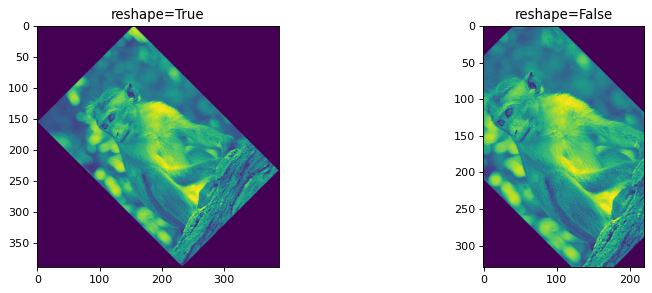

In [15]:
#Rotation
figure(figsize=(12,4), dpi=80)
rotated_img = ndimage.rotate(img, 45)
plt.subplot(1,2,1)
plt.imshow(rotated_img)
rotated_img_noreshape = ndimage.rotate(img, 45, reshape=True)
plt.title('reshape=True')
plt.imshow(rotated_img_noreshape)
plt.subplot(1,2,2)
rotated_img_noreshape = ndimage.rotate(img, 45, reshape=False)
plt.title('reshape=False')
plt.imshow(rotated_img_noreshape)
plt.show()

## Filtering

### Local filters: replace the value of pixels by a function of the values of neighboring pixels

In [16]:
from skimage import io, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
img = img_as_ubyte(io.imread("images/monkey.jpg", as_gray=True))
img1 = img_as_ubyte(io.imread("images/test_image.jpg", as_gray=True))
img2 = img_as_ubyte(io.imread("images/test_images/aeroplane/1.jpg", as_gray=False))

### Uniform filter

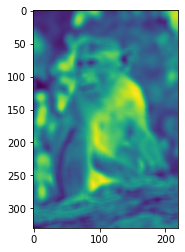

In [17]:
uniform_filtered_img = ndimage.uniform_filter(img, size=9)
plt.imshow(uniform_filtered_img)
plt.show()

### Gaussian filter

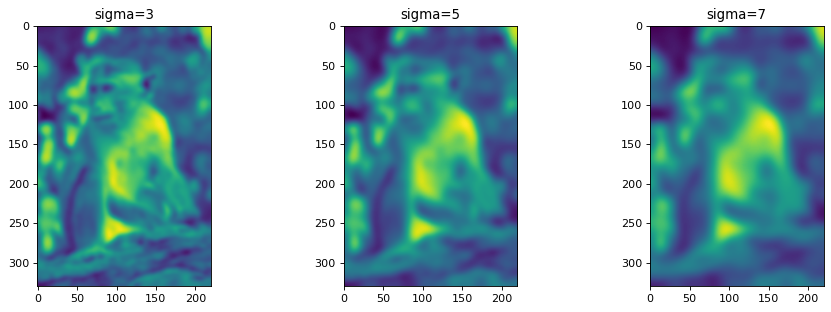

In [18]:
#Gaussian filter: from scipy.ndimage
# Gaussian filter smooths noise but also edges
from matplotlib.pyplot import figure
figure(figsize=(12,4), dpi=80)
plt.subplot(1,3,1)
blurred_img = ndimage.gaussian_filter(img, sigma=3)  #also try 5, 7
plt.title('sigma=3')
plt.imshow(blurred_img)
plt.subplot(1,3,2)
blurred_img = ndimage.gaussian_filter(img, sigma=5)
plt.title('sigma=5')
plt.imshow(blurred_img)
plt.subplot(1,3,3)
blurred_img = ndimage.gaussian_filter(img, sigma=7)
plt.title('sigma=7')
plt.imshow(blurred_img)
plt.imshow(blurred_img)
plt.tight_layout()
plt.show()

### Median filter

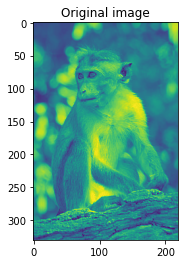

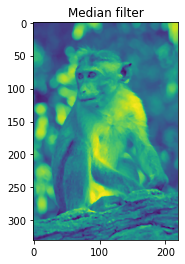

In [19]:
#Median filter is better than gaussian. A non-local means is even better
plt.imshow(img)
plt.title('Original image')
plt.show()
median_img = ndimage.median_filter(img, 3)
plt.title('Median filter')
plt.imshow(median_img)
plt.show()

### Edge detection

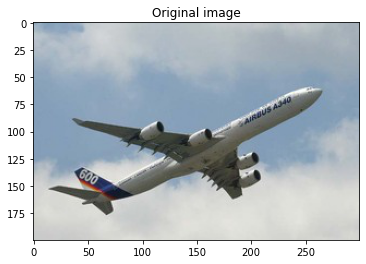

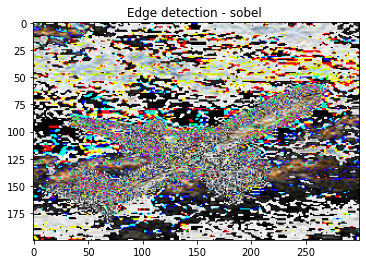

In [20]:
#Edge detection
plt.imshow(img2)
plt.title('Original image')
plt.show()
sobel_img = ndimage.sobel(img2, axis=0)  #Axis along which to calculate sobel
plt.title('Edge detection - sobel ')
plt.imshow(sobel_img)

In [ ]:
#for a list of all filters
#https://docs.scipy.org/doc/scipy/reference/ndimage.html